
# Analyzing a real world data-set with SQL and Python

## Objectives

*   Pre-process a dataset of selected socioeconomic indicators in Chicago
*   Store data in an SQLite database.
*   Use SQL (& Python) to better understand socioeconomic factors in Chicago



## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under 18 or Over 64**:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators




### Connect to the database


  **%sql sqlite://DatabaseName**   
  



In [8]:
import pandas as pd
import seaborn as sns
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [9]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [10]:
%sql sqlite:///socioeconomic.db

### Storing the dataset in a Table




In [11]:
import pandas as pd
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

78

In [12]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

##### Verifying that the table creation was successful


In [13]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

Running query in 'sqlite:///socioeconomic.db'

ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

##### Number of rows in the dataset


In [14]:
df1 = pd.read_sql("SELECT * FROM chicago_socioeconomic_data", con)
df1.shape

%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA

Running query in 'sqlite:///socioeconomic.db'

COUNT(*)
78



##### How many community areas in Chicago have a hardship index greater than 50.0?


In [15]:
df1.columns
    
%sql SELECT COUNT(*) FROM CHICAGO_SOCIOECONOMIC_DATA WHERE HARDSHIP_INDEX > 50


Running query in 'sqlite:///socioeconomic.db'

COUNT(*)
38



##### What is the maximum value of hardship index in this dataset?


In [16]:
df1['hardship_index'].idxmax()
df1.at[53, 'hardship_index']

%sql SELECT MAX(HARDSHIP_INDEX) FROM CHICAGO_SOCIOECONOMIC_DATA

Running query in 'sqlite:///socioeconomic.db'

MAX(HARDSHIP_INDEX)
98.0



##### Which community area has the highest hardship index?


In [17]:
df1.columns
df1_ca = df1[['community_area_name','hardship_index']]
df1_ca.sort_values(by='hardship_index',ascending= False)
%sql SELECT COMMUNITY_AREA_NAME, HARDSHIP_INDEX FROM CHICAGO_SOCIOECONOMIC_DATA ORDER BY HARDSHIP_INDEX DESC LIMIT 3

Running query in 'sqlite:///socioeconomic.db'

community_area_name,hardship_index
Riverdale,98.0
Fuller Park,97.0
South Lawndale,96.0



##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [18]:
df1.columns
df1_60k = df1[(df['per_capita_income_'] > 60000)]
df1_60k[['community_area_name', 'per_capita_income_']]
%sql SELECT COMMUNITY_AREA_NAME, PER_CAPITA_INCOME_ FROM CHICAGO_SOCIOECONOMIC_DATA WHERE PER_CAPITA_INCOME_ > 60000

Running query in 'sqlite:///socioeconomic.db'

community_area_name,per_capita_income_
Lake View,60058
Lincoln Park,71551
Near North Side,88669
Loop,65526



##### A scatter plot was used to show the relationship between variables `per_capita_income_` and `hardship_index`. A negative correlation is observed.


Correlation Coefficient is: nan P_Value is: nan


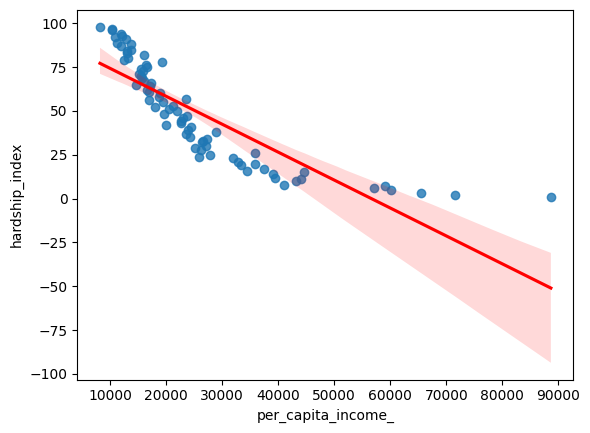

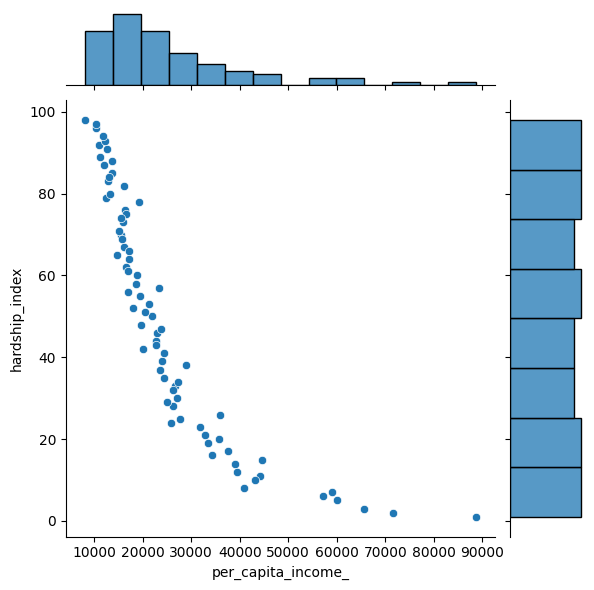

In [19]:
from scipy import stats

sns.regplot(x=df1['per_capita_income_'], y=df1['hardship_index'], line_kws={'color':'red'}, data=df1)
sns.jointplot(x=df1['per_capita_income_'], y=df1['hardship_index'], data=df1)

pearson_coef,p_value = stats.pearsonr(df['per_capita_income_'], df['hardship_index'])
print("Correlation Coefficient is:", pearson_coef, "P_Value is:", p_value)

In [20]:
df1['per_capita_income_'].isnull().value_counts()

df1[['hardship_index', 'per_capita_income_']].corr()

,hardship_index,per_capita_income_
hardship_index,1.000000,-0.849167
per_capita_income_,-0.849167,1.000000



##### Correlation coefficient is NaN due to null values. We can further explore this dataset to see how the variable `per_capita_income_` is related to `percent_households_below_poverty` and `percent_aged_16_unemployed`.


##### Author of IBM Lab

<a href="https://www.linkedin.com/in/ravahuja/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01" target="_blank">Rav Ahuja</a>

##### <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
